# The Sparks Foundation - GRIP - Data Science and Business Analytics

# Author: SOHAIL AHMED

# April 2022

# TASK 1 :  Prediction using Supervised Machine Learning
# <font size = '4'> Predicting the percentage of an student based on the number of study hours.

# <span style="color: blue; font-size:18px">Importing essential librariers</span>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# <span style="color: blue; font-size:18px">Importing the dataset</span>

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

# <span style="color: blue; font-size:18px">Exploring the dataset</span>

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Counting the number of Rows and Columns
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# <span style="color: blue; font-size:18px">Statistical insights</span>

In [8]:
# The correlation between number of hours studied and respective scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
# Statistical values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# <span style="color: blue; font-size:18px">Data visualization with Histogram and Scatter plots</span>

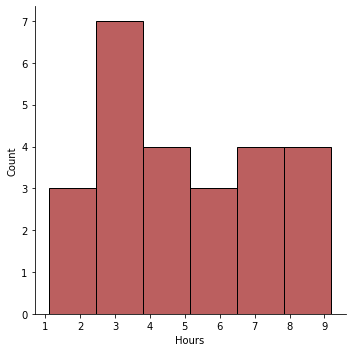

In [10]:
#Visual Representation through Histogram
sns.displot(data['Hours'],label='hour',color='brown')

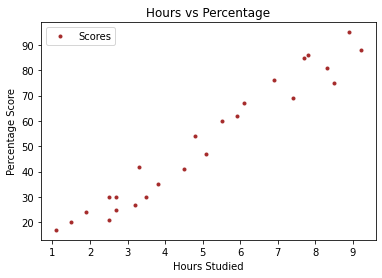

In [11]:
# Plotting the Score Distribution in Data
data.plot(x='Hours', y='Scores', style='.', color= 'brown')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# <span style="color: blue; font-size:18px">Preparing the data</span>

In [12]:
# Dividing Data into Attributes/Inputs And Labels/Outputs
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
y.shape, x.shape

((25,), (25, 1))

# <span style="color: blue; font-size:18px">Splitting the data into test and train sets</span>

In [13]:
# Splitting Data into Training and Testing sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state=0)

# <span style="color: blue; font-size:18px">Training the algorithm</span>

In [14]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

# <span style="color: blue; font-size:18px">Regression Line plot</span>

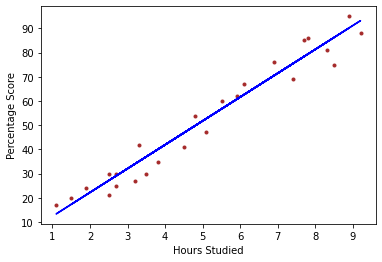

In [15]:
line = reg.coef_ * x + reg.intercept_

# Plotting for the test data
plt.scatter(x, y, color='brown', marker='.')
plt.plot(x, line, color= 'blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# <span style="color: blue; font-size:18px">Prediction and comparision of values</span>

In [16]:
# Making Predictions and Comparing actual and predicted values
y_pred=reg.predict(x_test) # predicted testset values
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


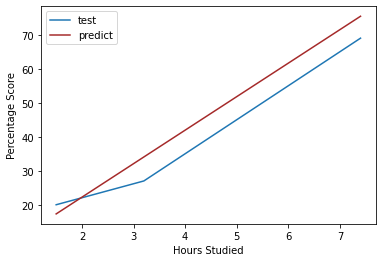

In [17]:
plt.plot(x_test,y_test,label="test")
plt.plot(x_test,y_pred,color="brown",label="predict")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
leg=plt.legend()
plt.show()

In [18]:
hours = [[2],[5.4],[8],[9]]
own_pred = reg.predict(hours)
print("No of Hours studied = {}".format(hours))
print("Predicted Score  = {}".format(own_pred))

No of Hours studied = [[2], [5.4], [8], [9]]
Predicted Score  = [22.22958753 55.73575592 81.35811999 91.2128754 ]


# <span style="color: blue; font-size:18px">Predicted score if a student studies for 9.5 hours/day</span>

In [19]:
Percentage_Score = reg.predict(np.array([[9.5]]))
print('Number of Hours studied : 9.5 hrs/day')
print(f'Percentage Score : {Percentage_Score}')

Number of Hours studied : 9.5 hrs/day
Percentage Score : [96.1402531]


# <span style="color: blue; font-size:18px">Evaluating the model</span>

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.3994503136120064


In [21]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 32.865569647342106


# <span style="color: blue; font-size:18px"> Conclusion:
Correlation between scores and hours is 0.9761, which implies a Positive Linear Realtionship. 
Predicting score of a student who studies for 9.5 hrs/day, using Simple Linear Regression model is a predicted perecentage of 96.140</span>